# Importing Libraries and Reading our Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df= pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-Processing our dataset

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (284807, 31)


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
print("Class Distribution:\n", df['Class'].value_counts())

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(len(fraud))  # Undersampling to balance the dataset
balanced_df = pd.concat([fraud, non_fraud])
print(balanced_df)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
278470  168239.0 -0.263244  1.073597 -0.372183 -0.700505  0.405142 -0.768720   
201884  134077.0  2.022476 -0.082372 -2.105579  0.401025  0.346204 -1.036957   
209702  137668.0  2.112222  0.692068 -3.214782  0.709747  1.255172 -1.632278   
281191  169997.0  1.985504 -0.177992 -1.072747  0.056609  0.104152 -0.570694   
143091   85115.0 -2.365199  1.142317  0.236972  0.482095 -1.311259 -0.358795   

              V7        V8        V9  .

# Splitting the dataset

In [8]:
X = balanced_df.drop(columns=['Class'])
y = balanced_df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='logloss')

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('gb', gb)], voting='soft')

# Training the model

In [10]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

# Prediction and Evaluation

In [11]:
#prediction
y_pred = ensemble_model.predict(X_test)

In [12]:
#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9695431472081218
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        98
           1       0.99      0.95      0.97        99

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

Confusion Matrix:
 [[97  1]
 [ 5 94]]


# Graph Plotting

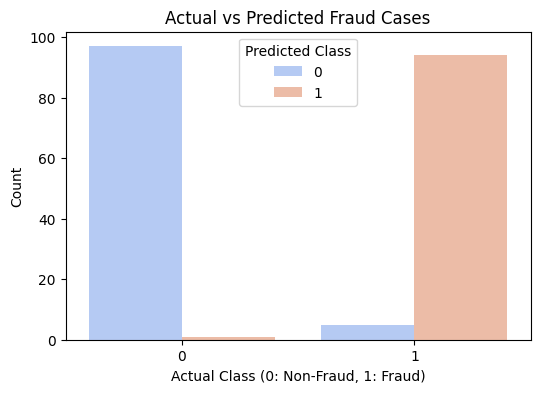

In [13]:
plt.figure(figsize=(6, 4))

comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

sns.countplot(data=comparison_df, x="Actual", hue="Predicted", palette="coolwarm")

plt.xlabel("Actual Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Fraud Cases")
plt.legend(title="Predicted Class")
plt.show()

# Predictions

### Test Data

In [14]:
test_data1 = pd.DataFrame({
    "Time": [78396.99],
    "Amount": [5378.87],
    "V1": [-46.56],
    "V2": [-62.79],
    "V3": [-27.89],
    "V4": [4.04],
    "V5": [3.94],
    "V6": [-18.93],
    "V7": [-16.23],
    "V8": [-40.39],
    "V9": [-0.93],
    "V10": [-5.01],
    "V11": [2.09],
    "V12": [-7.37],
    "V13": [3.55],
    "V14": [-9.62],
    "V15": [-4.32],
    "V16": [-3.77],
    "V17": [0.49],
    "V18": [-9.17],
    "V19": [-4.93],
    "V20": [18.77],
    "V21": [-15.93],
    "V22": [-9.75],
    "V23": [-42.04],
    "V24": [1.89],
    "V25": [-9.87],
    "V26": [2.04],
    "V27": [9.20],
    "V28": [25.39]
})


test_data2 = pd.DataFrame({
    "Time": [28692.0],
    "Amount": [99.99],
    "V1": [-29.200329],
    "V2": [16.155701],
    "V3": [-30.013712],
    "V4": [6.476731],
    "V5": [-21.22581],
    "V6": [-4.902997],
    "V7": [-19.791248],
    "V8": [19.168327],
    "V9": [-3.617242],
    "V10": [2.454871],
    "V11": [-1.237843],
    "V12": [1.718475],
    "V13": [-2.149777],
    "V14": [1.676012],
    "V15": [-0.926454],
    "V16": [1.759628],
    "V17": [-0.500783],
    "V18": [0.217003],
    "V19": [0.519732],
    "V20": [1.715862],
    "V21": [1.809371],
    "V22": [-2.175815],
    "V23": [-1.365104],
    "V24": [0.174286],
    "V25": [2.103868],
    "V26": [-0.209944],
    "V27": [1.278681],
    "V28": [0.372393]
})




### Predictions

In [15]:
# For test data 1
prediction1 = ensemble_model.predict(test_data1.to_numpy())
print("Prediction:", prediction1[0])

#For test data 2
prediction2 = ensemble_model.predict(test_data2.to_numpy())
print("Prediction:", prediction2[0])


Prediction: 1
Prediction: 1


In [ ]:

import pickle

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(ensemble_model, f)

print("✅ model.pkl saved!")

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ scaler.pkl saved!")


✅ model.pkl saved!
